# <span style='font-family:montserrat;color:#0A043C'>Twitter Sentiment Analysis with Machine Learning</span>

### <span style='font-family:montserrat;color:#C84B31'>Project by Kalpana Kashyap</span>

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [112]:
df = pd.read_csv('tweets_data.csv')
df.head()

,Unnamed: 0,id,label,tweet
0,0,1,0,@user when a father is dysfunctional and is s...
1,1,2,0,@user @user thanks for #lyft credit i can't us...
2,2,3,0,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31962 non-null  int64 
 1   id          31962 non-null  int64 
 2   label       31962 non-null  int64 
 3   tweet       31962 non-null  object
dtypes: int64(3), object(1)
memory usage: 998.9+ KB


In [114]:
# remove pattern
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [115]:
# remove twitter handle @
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [116]:
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet
0,0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,2,3,0,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [117]:
# remove special characters
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet
0,0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,2,3,0,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [118]:
# remove small words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet
0,0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,2,3,0,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [119]:
# words tokenization
token_tweet = df['clean_tweet'].apply(lambda x:x.split())
token_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [120]:
# words stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
token_tweet = token_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
token_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [121]:
# combine in a sentence
for i in range (len(token_tweet)):
    token_tweet[i] = " ".join(token_tweet[i])
df['clean_tweet'] = token_tweet
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet
0,0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,2,3,0,bihday your majesty,bihday your majesti
3,3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,4,5,0,factsguide: society now #motivation,factsguid societi #motiv


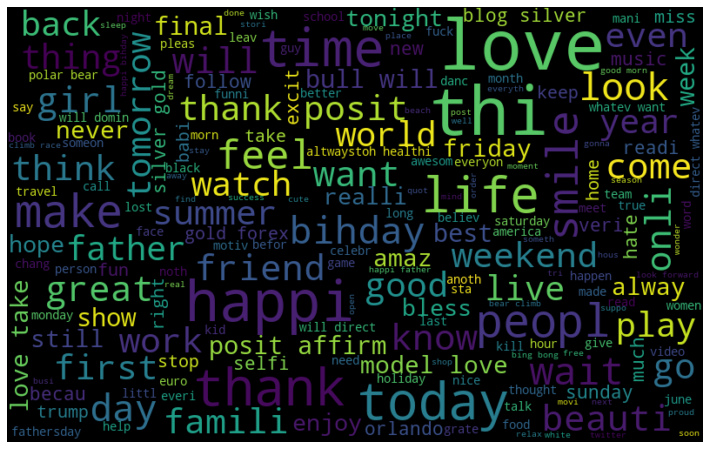

In [122]:
# displaying wordcloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=80).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

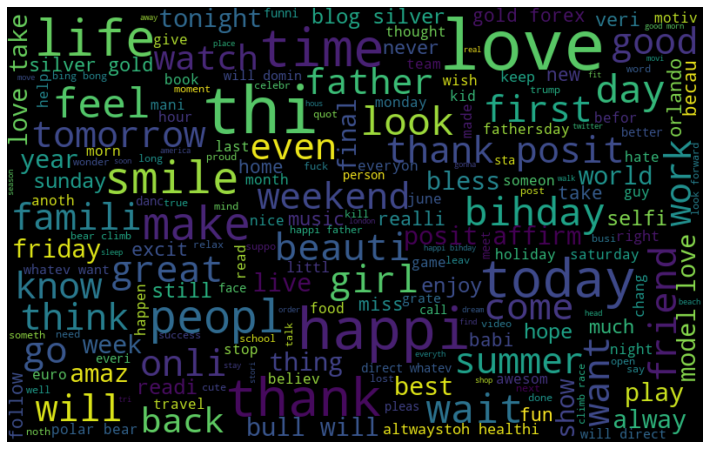

In [123]:
# displaying wordcloud for positive tweets i.e label == 0
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=80).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

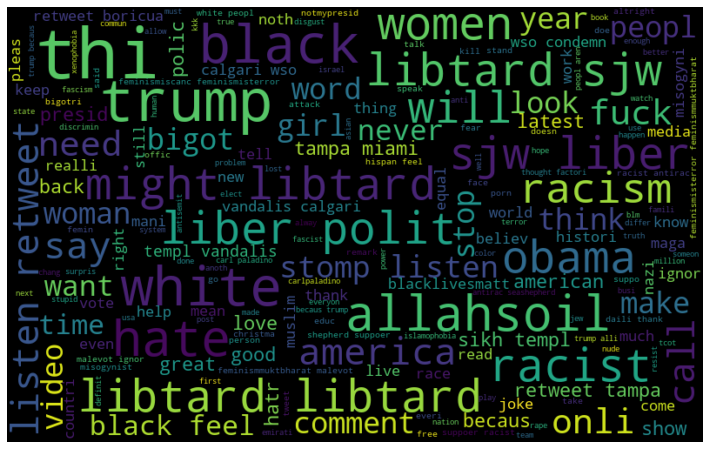

In [124]:
# displaying wordcloud for negative tweets i.e label == 1
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=80).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [125]:
# check hashtag of tweet
def check_hashtag(tweets):
    hashtag = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtag.append(ht)
    return hashtag

In [126]:
positive_lst = check_hashtag(df['clean_tweet'][df['label']==0])
negative_lst = check_hashtag(df['clean_tweet'][df['label']==1])
positive_lst = sum(positive_lst, [])
negative_lst = sum(negative_lst, [])

In [127]:
positive_lst[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [128]:
negative_lst[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [129]:
freq = nltk.FreqDist(positive_lst)
d1 = pd.DataFrame({'Hashtag':list(freq.keys()),'Count':list(freq.values())})
d1.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


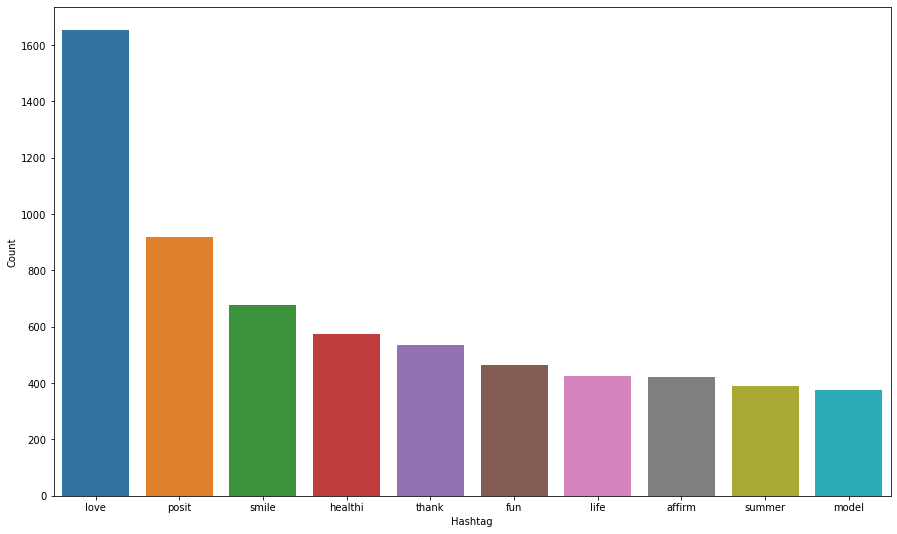

In [130]:
# display bar graph for top 10 positive tweets
d1 = d1.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d1, x='Hashtag', y='Count')
plt.show()

In [131]:
# display bar graph for top 10 negative tweets
freq = nltk.FreqDist(negative_lst)
d2 = pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})
d2.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


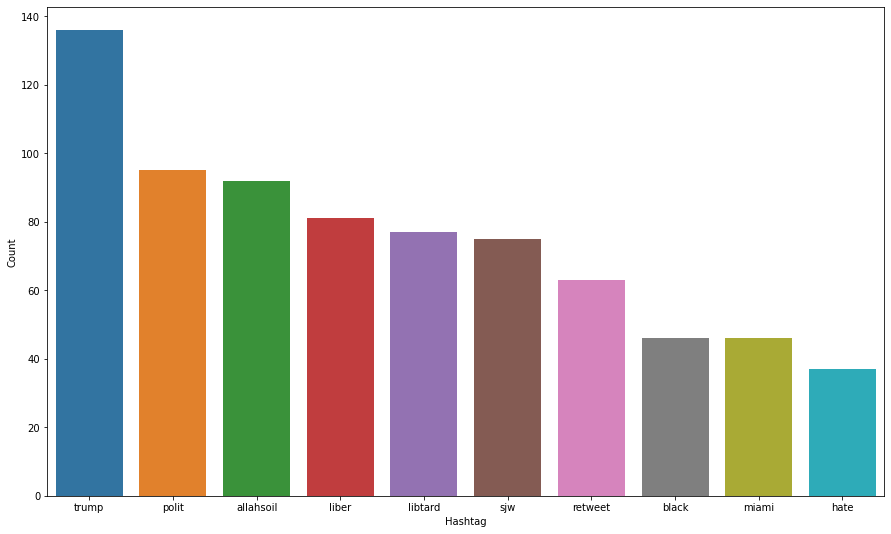

In [132]:
d2 = d2.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d2, x='Hashtag', y='Count')
plt.show()

In [133]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [134]:
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("f1_score: ", f1_score(y_test, pred))
print("Accuracy: ", accuracy_score(y_test, pred))

f1_score:  0.49763033175355453
Accuracy:  0.9469403078463271
